In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession


In [4]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


In [11]:
training_set = datagen.flow_from_directory(
        "D:/miniproj/machine_learning/training_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 8005 images belonging to 2 classes.


In [13]:
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory("D:/miniproj/machine_learning/test_set"
        ,
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 2023 images belonging to 2 classes.


In [14]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [15]:
from tensorflow.keras.regularizers import l2

In [16]:
cnn = tf.keras.models.Sequential()

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

In [18]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [20]:
cnn.add(tf.keras.layers.Flatten())

In [21]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [22]:
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [23]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,545 (1.04 MB)

 Trainable params: 272,545 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [25]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 124s 470ms/step - accuracy: 0.5221 - loss: 0.9983 - val_accuracy: 0.6520 - val_loss: 0.7923
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 161ms/step - accuracy: 0.6318 - loss: 0.7695 - val_accuracy: 0.7034 - val_loss: 0.7536
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 43s 167ms/step - accuracy: 0.6748 - loss: 0.6939 - val_accuracy: 0.6990 - val_loss: 0.6652
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 155ms/step - accuracy: 0.6917 - loss: 0.6479 - val_accuracy: 0.7118 - val_loss: 0.6265
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 150ms/step - accuracy: 0.7112 - loss: 0.6121 - val_accuracy: 0.7395 - val_loss: 0.6130
Epoch 6/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 153ms/step - accuracy: 0.7197 - loss: 0.5902 - val_accuracy: 0.7128 - val_loss: 0.5941
Epoch 7/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 152ms/step - accuracy: 0.7212 - loss: 0.5870 - val_accuracy: 0.7415 - val_loss: 0.7087
Epoch 8/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 147ms/step - accuracy: 0.7288 - loss: 

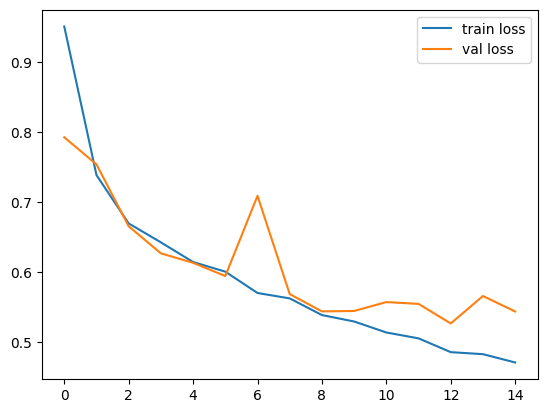

In [26]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

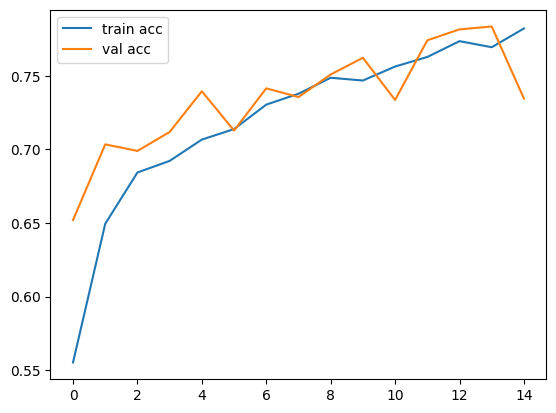

In [27]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [28]:
from tensorflow.keras.models import load_model

cnn.save('./model_rcat_dog.h5')

In [33]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('D:/miniproj/machine_learning/training_set/cats/cat.14.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [34]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is cat
